<a href="https://colab.research.google.com/github/G-Shivani973/Cognitive-Load-Memory/blob/main/CognitiveLoadMemory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:

# Load the cleaned dataset
df = pd.read_excel("/content/Cognitive Load Theory Survey Questions (lec-1) (Responses).xlsx")


In [ ]:

# Feature Selection
features = ["Score", "No of reading", "Rate"]
df.rename(columns={"No of reading": "Reading_Count"}, inplace=True)
features = ["Score", "Reading_Count", "Rate"]

target = "Cognitive_Load_Level"


In [ ]:

# Generate Cognitive Load Levels based on Score
def classify_cognitive_load(score):
    if score <= 1:
        return "Low"
    elif score <= 3:
        return "Medium"
    else:
        return "High"

df[target] = df["Score"].apply(classify_cognitive_load)

In [ ]:
df["Reading_Count"] = df["Reading_Count"].replace({
    "Once": 1,
    "1 time": 1,   # Handling different wording
    "Twice": 2,
    "2 times": 2,  # Handling different wording
    "2 times or more": 3,
    "Three times": 3,
    "More than 3 times": 4  # Adjust based on actual values
}).astype(float)


<ipython-input-6-06c395d4c085>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Reading_Count"] = df["Reading_Count"].replace({


In [ ]:
print(df["Reading_Count"].unique())  # Find all unique entries


[1. 3.]


In [ ]:
print(df.dtypes)  # Check data types
print(df["Reading_Count"].unique())  # Verify all unique values


Timestamp                                                                                                   datetime64[ns]
Score                                                                                                                int64
A class is a user defined data type.                                                                                object
What does your class can hold?                                                                                      object
Identify the Object in this scenario: The object could bounce fast or slow and could roll left or right.            object
What will be the output?                                                                                            object
Reading_Count                                                                                                      float64
Rate                                                                                                                 int64
Cognitive_Load_L

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["Cognitive_Load_Level"] = le.fit_transform(df["Cognitive_Load_Level"])  # Convert to numbers


In [ ]:
X = df[["Score", "Reading_Count", "Rate"]]  # Use only numerical features
y = df["Cognitive_Load_Level"]  # Encoded target



In [ ]:

# Splitting Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:

# Train Model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)  # Now should work fine!


RandomForestClassifier(random_state=42)

In [ ]:

# Predictions
y_pred = clf.predict(X_test)


In [ ]:

# Evaluate Model
from sklearn.metrics import accuracy_score
print("Model Accuracy:", accuracy_score(y_test, y_pred))

Model Accuracy: 1.0


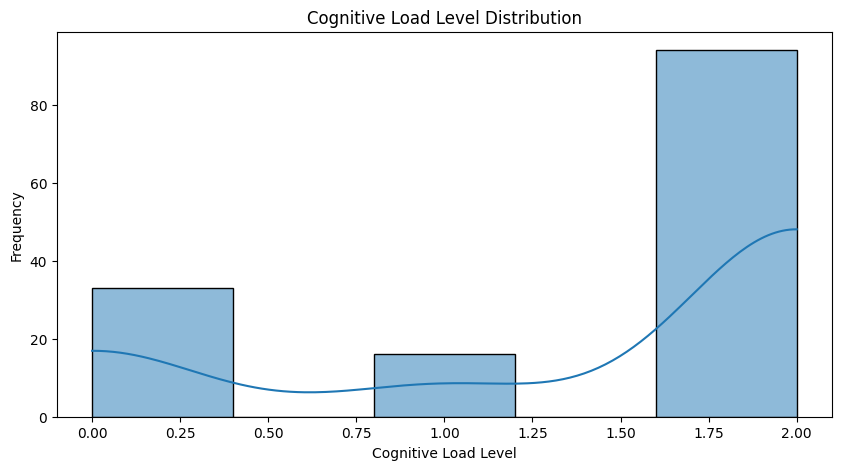

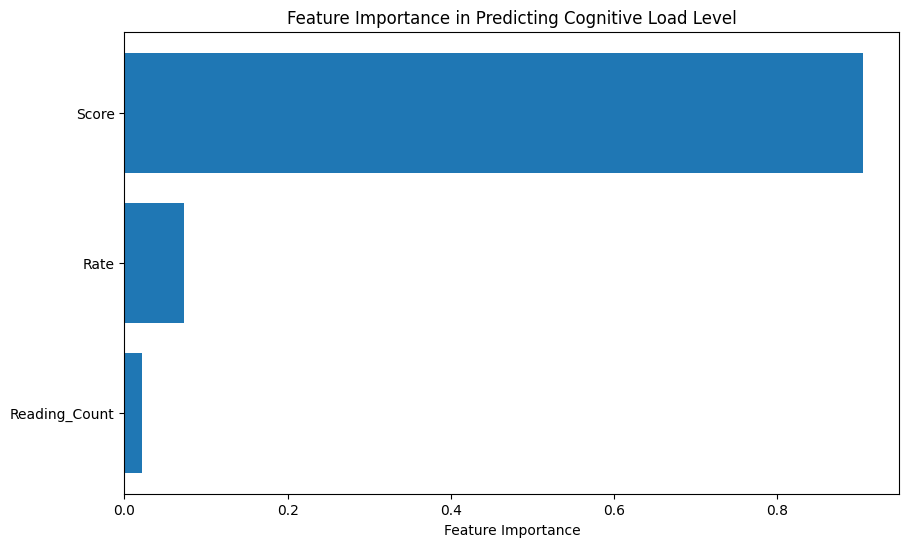

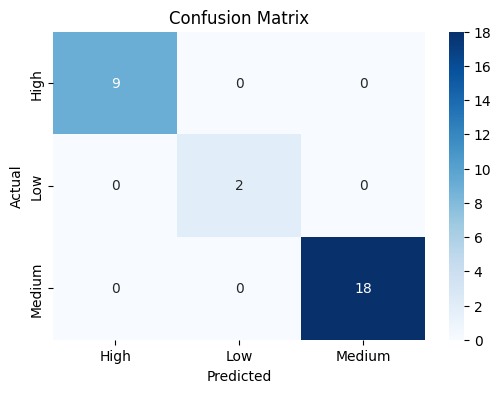

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         2
           2       1.00      1.00      1.00        18

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# 1️⃣ Data Distribution: Histogram
plt.figure(figsize=(10, 5))
sns.histplot(df["Cognitive_Load_Level"], bins=5, kde=True)
plt.title("Cognitive Load Level Distribution")
plt.xlabel("Cognitive Load Level")
plt.ylabel("Frequency")
plt.show()

# 2️⃣ Feature Importance Plot
importances = clf.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Predicting Cognitive Load Level")
plt.show()

# 3️⃣ Confusion Matrix Heatmap
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# 4️⃣ Print Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))
